In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
# 한글 폰트 적용
from matplotlib import rc
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 확인
fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 폰트 설정, 확인
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']

font_location = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [2]:
welfare_raw = pd.read_csv('welfare.csv')
welfare = welfare_raw.copy()
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대
...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대


In [3]:
welfare = welfare.drop(['Unnamed: 0'], axis=1)

In [4]:
welfare.info()
welfare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16591 entries, 0 to 16590
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      16591 non-null  object 
 1   출생년도    16591 non-null  float64
 2   혼인상테    16591 non-null  float64
 3   종교      16591 non-null  float64
 4   월급      5633 non-null   float64
 5   직종번호    8403 non-null   float64
 6   지역      16591 non-null  float64
 7   나이      16591 non-null  float64
 8   연령별     16591 non-null  object 
 9   연령대     14180 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1.3+ MB


,출생년도,혼인상테,종교,월급,직종번호,지역,나이
count,16591.000000,16591.000000,16591.000000,5633.000000,8403.000000,16591.000000,16591.000000
mean,1969.066241,1.795853,1.552709,275.647080,592.390456,3.859562,52.933759
std,24.158054,1.581226,0.497229,214.807673,267.891741,2.039554,24.158054
min,1906.000000,0.000000,1.000000,0.000000,111.000000,1.000000,1.000000
25%,1949.000000,1.000000,1.000000,125.000000,313.000000,2.000000,34.000000
50%,1965.000000,1.000000,2.000000,236.000000,611.000000,3.000000,57.000000
75%,1988.000000,2.000000,2.000000,363.000000,873.000000,6.000000,73.000000
max,2021.000000,6.000000,2.000000,2017.000000,1009.000000,7.000000,116.000000


In [5]:
# < 7. 작업에 따른 월급의 차이 >
# 1) 변수 검토 및 전처리(직종, 월급)
# 1-1) 작업 변수 확인
welfare['직종번호'].dtype #dtype('float64')
welfare['직종번호'].value_counts() # 직종 개수: 152

직종번호
611.0    1248
941.0     677
521.0     376
999.0     315
312.0     278
         ... 
861.0       1
238.0       1
822.0       1
872.0       1
423.0       1
Name: count, Length: 152, dtype: int64

In [6]:
# 직종코드별 직좀명 파일 불러오기
list_job = pd.read_excel('Koweps_Codebook.xlsx', sheet_name='직종코드')
list_job

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [7]:
list_job = list_job.rename(columns={'code_job':'직종번호', 'job':'직업'})
list_job

,직종번호,직업
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [8]:
# welfare에 list_job 병합
welfare = welfare.merge(list_job, how='left', on='직종번호')
welfare

,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대,직업
0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대,NaN
1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대,건물 관리원 및 검표원
2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대,전기공
3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대,금속기계 부품 조립원
4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대,고객 상담 및 기타 사무원
...,...,...,...,...,...,...,...,...,...,...,...
16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대,컴퓨터 시스템 및 소프트웨어 전문가
16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대,NaN
16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN,NaN
16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대,종교 관련 종사자


In [9]:
# 직업 변수 확인
welfare['직업'].value_counts()

직업
작물 재배 종사자                1248
청소원 및 환경미화원               677
매장 판매 종사자                 376
기타 서비스 관련 단순 종사자          315
경영 관련 사무원                 278
                         ... 
발전 및 배전장치 조작원               1
항공기∙선박 기관사 및 관제사            1
직물∙신발 관련 기계 조작원 및 조립원       1
철도운송 관련 종사자                 1
혼례 및 장례 종사자                 1
Name: count, Length: 152, dtype: int64

In [10]:
# 1-2. 월급 변수 검토
welfare['월급'].dtype # dtypes('float64')

# 결측치 아닌값의 개수: 5633
# 월급의 범위: 0 ~ 2017, 평균: 275(만원), 중앙값: 236(만원)
welfare['월급'].describe()

count    5633.000000
mean      275.647080
std       214.807673
min         0.000000
25%       125.000000
50%       236.000000
75%       363.000000
max      2017.000000
Name: 월급, dtype: float64

In [11]:
# 2. 분석표(통계요약표)
job_income = welfare.dropna(subset=['직업', '월급']) \
                    .groupby('직업', as_index=False) \
                    .agg(평균월급=('월급', 'mean'))
job_income # 151개

,직업,평균월급
0,가사 및 육아 도우미,89.567568
1,간호사,309.875000
2,감정∙기술영업및중개관련종사자,437.000000
3,건물 관리원 및 검표원,193.197531
4,건설 및 광업 단순 종사자,253.720000
...,...,...
146,화학∙고무 및 플라스틱 제품 생산기 조작원,480.272727
147,화학공학 기술자 및 시험원,740.250000
148,환경∙청소 및 경비 관련 관리자,110.933333
149,환경공학∙가스·에너지 기술자 및 시험원,380.000000


In [12]:
# 2-1. 월급을 가장 많이 받는 직업 10개 분석표
job_income_top10 = job_income.sort_values('평균월급', ascending=False).head(10)
job_income_top10

,직업,평균월급
60,법률 전문가,1000.000000
99,의료 진료 전문가,901.000000
132,컴퓨터 하드웨어 및 통신공학 전문가,813.555556
147,화학공학 기술자 및 시험원,740.250000
63,보험 및 금융 관리자,728.500000
110,장교,683.000000
141,항공기∙선박 기관사 및 관제사,677.000000
102,인사 및 경영 전문가,674.000000
30,기타 군인,656.500000
142,행정 및 경영 지원 관리자,654.166667


In [13]:
# 2-2. 월급을 가장 적게 받는 직업 10개 분석표
job_income_bottom10 = job_income.sort_values('평균월급').head(10)
job_income_bottom10

,직업,평균월급
76,세탁 관련 기계 조작원,27.000000
129,청소원 및 환경미화원,73.914992
34,기타 서비스 관련 단순 종사자,77.660584
0,가사 및 육아 도우미,89.567568
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,95.228070
148,환경∙청소 및 경비 관련 관리자,110.933333
98,음식 관련 단순 종사자,130.057692
43,돌봄 및 보건 서비스 종사자,134.764444
136,판매 관련 단순 종사자,146.166667
109,작물 재배 종사자,157.166667


<Axes: xlabel='평균월급', ylabel='직업'>

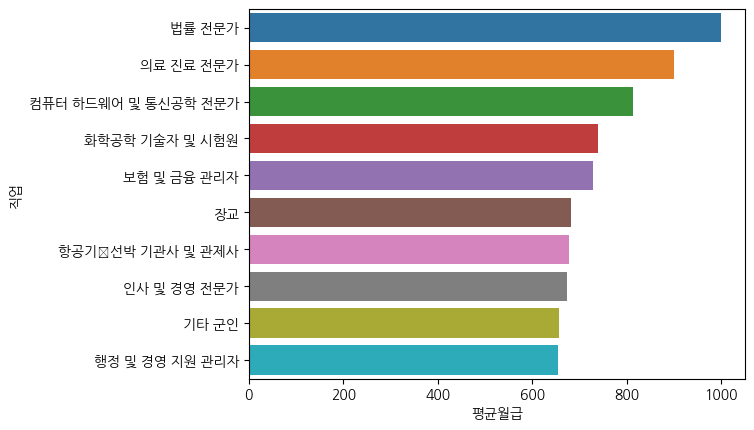

In [14]:
# 3-1. 월급을 가장 많이 받는 직업 시각화 - barplot
sns.barplot(data=job_income_top10, x='평균월급', y='직업')

<Axes: xlabel='평균월급', ylabel='직업'>

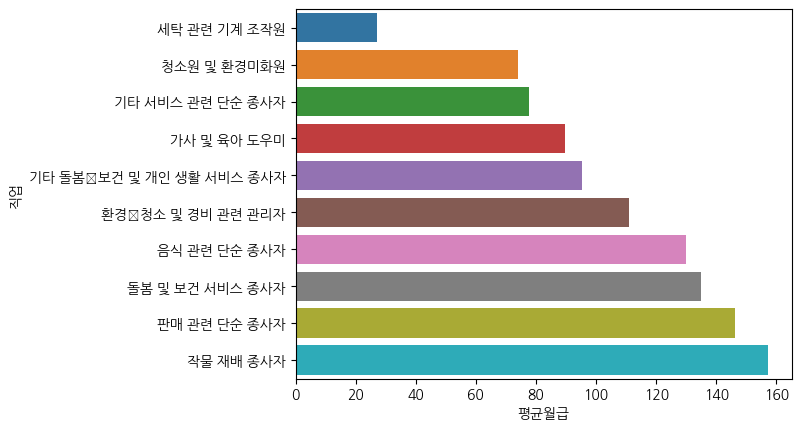

In [15]:
# 3-2. 월급을 가장 적게 받는 직업 시각화 - barplot
sns.barplot(data=job_income_bottom10, x='평균월급', y='직업')

In [16]:
# 4. 분석결과
# 가장 많은 월급을 받는 직업: 법률 전문가, 평균 월급: 1000만원
# 가장 적은 월급을 받는 직업: 세탁 관련 기계 조작원, 평균 월급: 27만원
# 가장 많은 월급을 받는 직업과 가장 적은 월급을 받는 직업의 평균 급여가 10배 가까운 차이를 보인다.

In [17]:
welfare.to_csv('welfare.csv') # csv 파일로 저장

In [18]:
welfare = pd.read_csv('welfare.csv')
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대,직업
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대,NaN
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대,건물 관리원 및 검표원
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대,전기공
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대,금속기계 부품 조립원
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대,고객 상담 및 기타 사무원
...,...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대,컴퓨터 시스템 및 소프트웨어 전문가
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대,NaN
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN,NaN
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대,종교 관련 종사자
